/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 - 57s - 30ms/step - accuracy: 0.8373 - loss: 0.4485 - val_accuracy: 0.8633 - val_loss: 0.3766
Epoch 2/5
1875/1875 - 56s - 30ms/step - accuracy: 0.8902 - loss: 0.2969 - val_accuracy: 0.8777 - val_loss: 0.3265
Epoch 3/5
1875/1875 - 83s - 44ms/step - accuracy: 0.9075 - loss: 0.2511 - val_accuracy: 0.8994 - val_loss: 0.2751
Epoch 4/5
1875/1875 - 53s - 28ms/step - accuracy: 0.9192 - loss: 0.2199 - val_accuracy: 0.9050 - val_loss: 0.2622
Epoch 5/5
1875/1875 - 54s - 29ms/step - accuracy: 0.9276 - loss: 0.1942 - val_accuracy: 0.9098 - val_loss: 0.2478


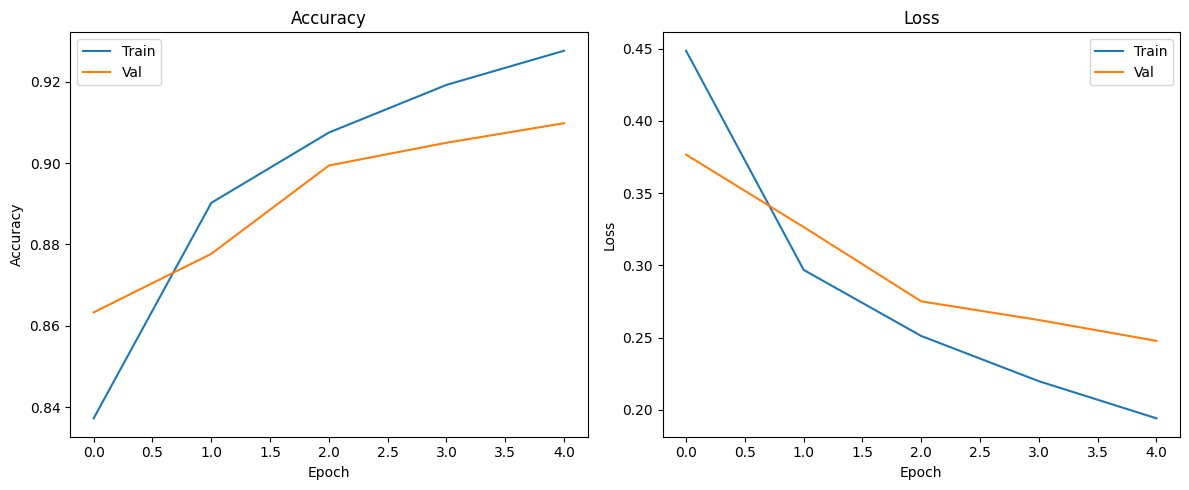

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


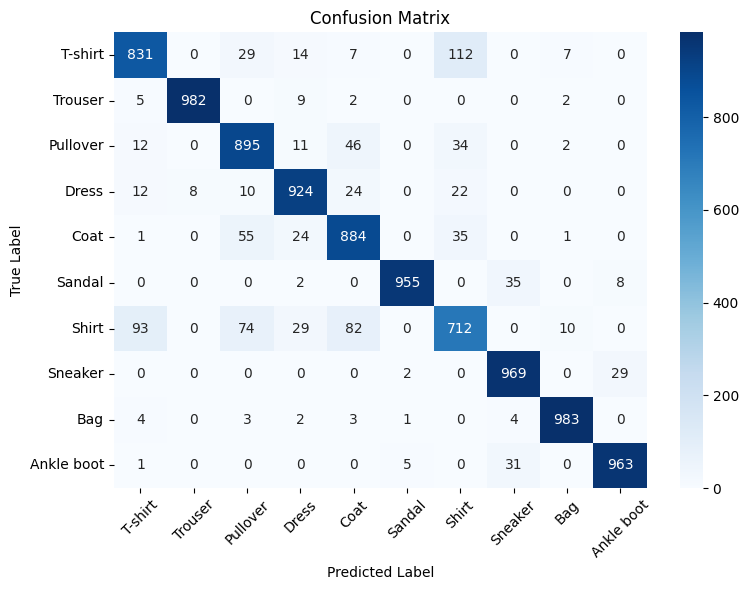

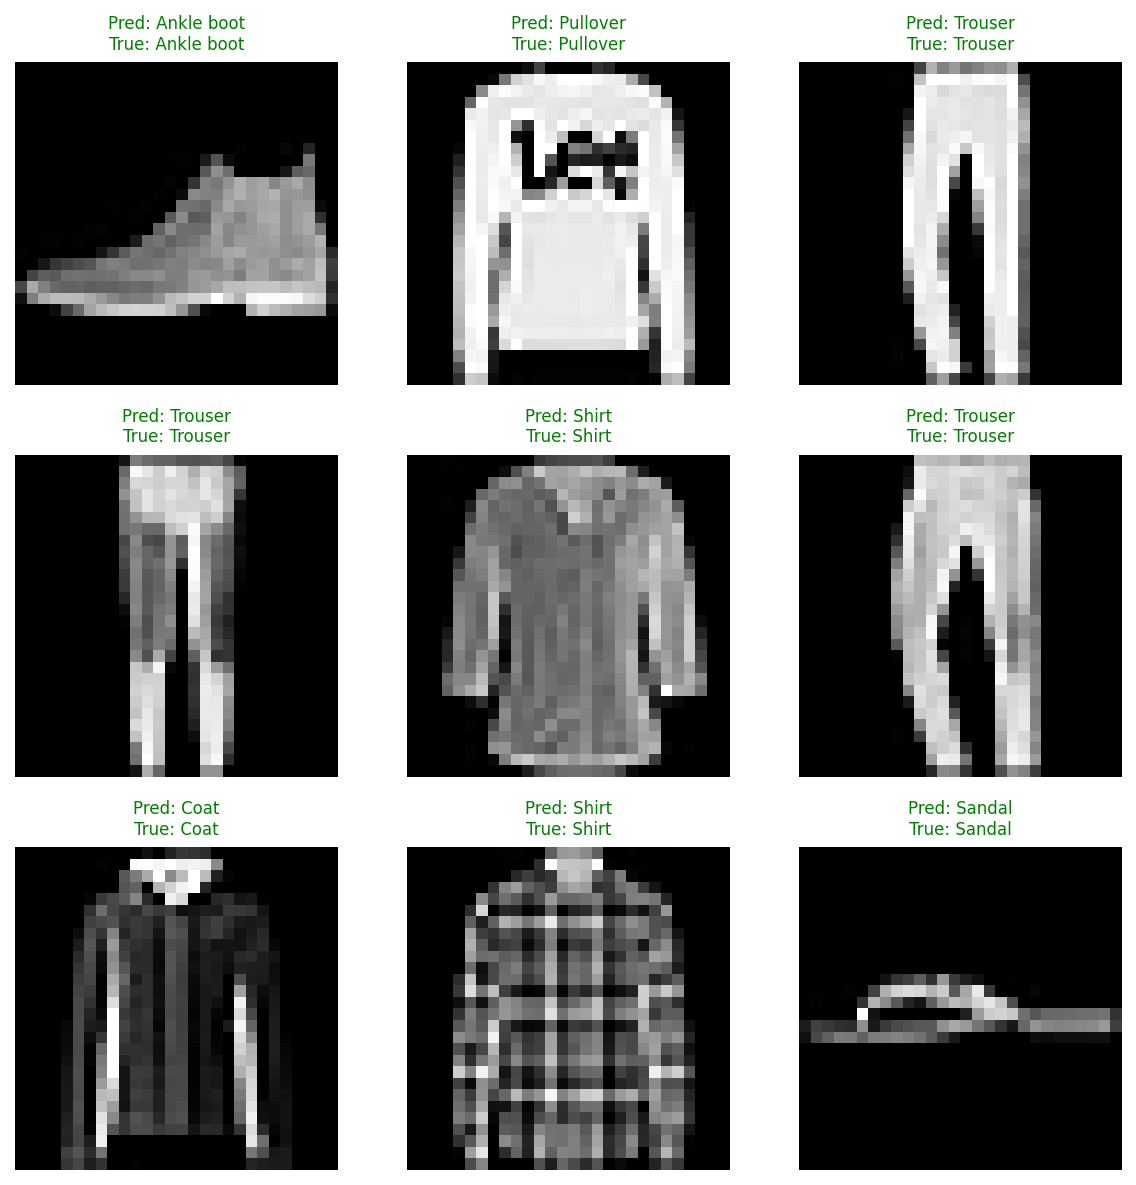

In [4]:
# 🚀 Fashion MNIST Classification using CNN - TensorFlow

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 📥 1. Load and Preprocess Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize + Reshape (Add channel dim)
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# 📦 Class Names
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 🧠 2. Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Show summary
model.summary()

# 🏋️‍♂️ 3. Train the model
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test), verbose=2)

# 📊 4. Plot Training Performance
plt.figure(figsize=(12, 5), dpi=100)

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Val")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Val")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# 🔍 5. Predict & Evaluate
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# 📉 Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🖼️ 6. Show Sample Predictions
plt.figure(figsize=(8, 8), dpi=150)
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    pred = y_pred_labels[i]
    true = y_test[i]
    color = 'green' if pred == true else 'red'
    plt.title(f"Pred: {class_names[pred]}\nTrue: {class_names[true]}", color=color, fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()
